In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=19c0a0a69ec28187983b4df8ef68c8dacf9a760a1e61ff34323e726c0cf457e9
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [ ]:
!mkdir known 
!wget https://e0.365dm.com/22/07/2048x1152/skysports-cristiano-ronaldo_5823297.jpg -O known/ronaldo.jpg
!wget file:///C:/Users/DELL/Downloads/WhatsApp%20Image%202023-03-11%20at%204.14.18%20PM.webp 
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Elon_Musk_Royal_Society_%28crop2%29.jpg/1200px-Elon_Musk_Royal_Society_%28crop2%29.jpg -O known/elon.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/1/18/Mark_Zuckerberg_F8_2019_Keynote_%2832830578717%29_%28cropped%29.jpg -O known/mark.jpg

--2023-03-11 12:20:58--  https://e0.365dm.com/22/07/2048x1152/skysports-cristiano-ronaldo_5823297.jpg
Resolving e0.365dm.com (e0.365dm.com)... 184.28.41.152, 184.28.41.147, 2600:1407:3c00:2f::17c8:9c8f, ...
Connecting to e0.365dm.com (e0.365dm.com)|184.28.41.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225488 (220K) [image/jpeg]
Saving to: ‘known/ronaldo.jpg’

known/ronaldo.jpg   100%[===================>] 220.20K  --.-KB/s    in 0.07s   

2023-03-11 12:20:59 (3.26 MB/s) - ‘known/ronaldo.jpg’ saved [225488/225488]

know/mubashir.jpg: No such file or directory
--2023-03-11 12:21:00--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Elon_Musk_Royal_Society_%28crop2%29.jpg/1200px-Elon_Musk_Royal_Society_%28crop2%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
!mkdir unknown
!wget https://phantom-marca.unidadeditorial.es/df656b39c5cc15a3b3feb71b9854b122/resize/1320/f/jpg/assets/multimedia/imagenes/2021/11/11/16366385149173.jpg -O unknown/1.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg -O unknown/2.jpg
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/125B3/production/_107178157_178151.jpg -O unknown/3.jpg
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/17C61/production/_126977379_gettyimages-1395371348.jpg -O unknown/4.jpg

--2023-03-11 11:33:03--  https://phantom-marca.unidadeditorial.es/df656b39c5cc15a3b3feb71b9854b122/resize/1320/f/jpg/assets/multimedia/imagenes/2021/11/11/16366385149173.jpg
Resolving phantom-marca.unidadeditorial.es (phantom-marca.unidadeditorial.es)... 13.226.22.37, 13.226.22.47, 13.226.22.103, ...
Connecting to phantom-marca.unidadeditorial.es (phantom-marca.unidadeditorial.es)|13.226.22.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74008 (72K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  72.27K   357KB/s    in 0.2s    

2023-03-11 11:33:04 (357 KB/s) - ‘unknown/1.jpg’ saved [74008/74008]

--2023-03-11 11:33:04--  https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting 

Processing 1.jpg


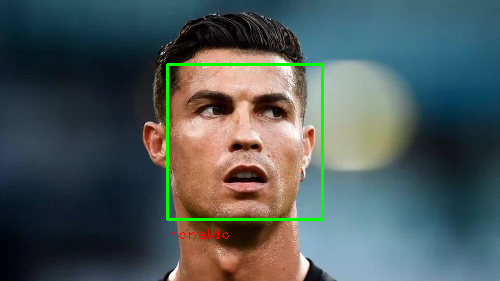

Processing 3.jpg


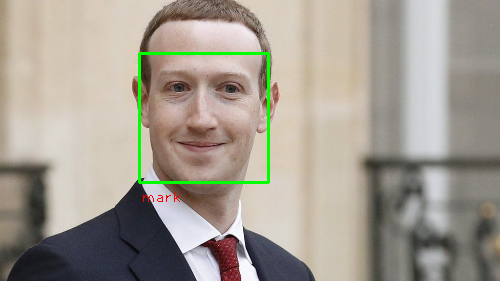

Processing 4.jpg


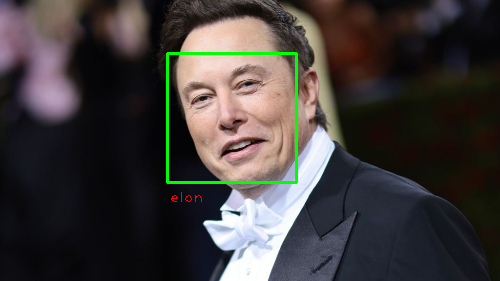

Processing 2.jpg


In [19]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)
            cv2_imshow(img)

            

    # print(results)

In [12]:
import cv2
import face_recognition
import os

# Load the known images and embeddings
known_faces = []
known_names = []

for file in os.listdir("known"):
    image = face_recognition.load_image_file("known/" + file)
    encoding = face_recognition.face_encodings(image)[0]
    known_faces.append(encoding)
    known_names.append(file.split(".")[0])

# Open the camera
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Check if the face is a match for the known faces
        matches = face_recognition.compare_faces(known_faces, face_encoding)
        name = "unknown"

        # If we have at least one match, use the first one
        if True in matches:
            first_match_index = matches.index(True)
            name = known_names[first_match_index]

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow("Video", frame)

    # Take a picture and store it in the unknown directory
    if cv2.waitKey(1) & 0xFF == ord("s"):
        ret, frame = cap.read()
        cv2.imwrite("unknown/unknown_face.jpg", frame)

    # Quit the program when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)


TypeError: ignored